In [9]:
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [36]:
train_data = np.resize(train_images, (*train_images.shape, 1))
test_data = np.resize(test_images, (*test_images.shape, 1))

In [21]:
from keras import models
from keras import layers
 
network = models.Sequential()
network.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))

network.add(layers.Flatten())
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [23]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [25]:
from keras.utils import to_categorical
 
train_labels_categorical = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)

In [28]:
history = network.fit(x=train_data, y=train_labels_categorical, batch_size=64, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 16s 271us/step - loss: 0.0351 - accuracy: 0.9916
Epoch 2/5
60000/60000 [==============================] - 16s 265us/step - loss: 0.0343 - accuracy: 0.9920
Epoch 3/5
60000/60000 [==============================] - 16s 262us/step - loss: 0.0357 - accuracy: 0.9922
Epoch 4/5
60000/60000 [==============================] - 16s 266us/step - loss: 0.0338 - accuracy: 0.9925
Epoch 5/5
60000/60000 [==============================] - 16s 268us/step - loss: 0.0346 - accuracy: 0.9930


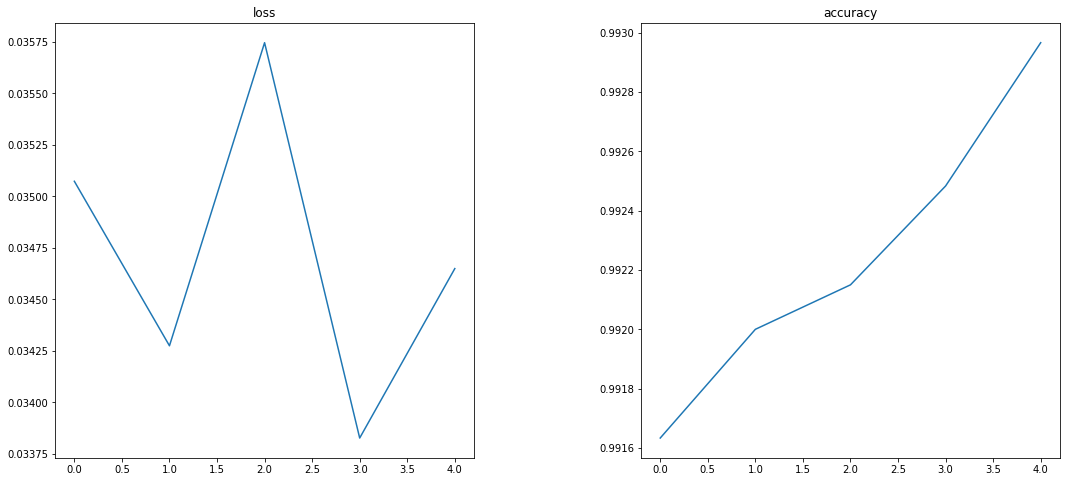

In [33]:
history_dict = history.history
history_dict.keys()

fig = plt.figure(figsize=(18, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(1, 2, 1)
plt.title('loss')
plt.plot(history_dict['loss'])
plt.subplot(1, 2, 2)
plt.title('accuracy')
plt.plot(history_dict['accuracy'])

plt.show()

In [37]:
test_loss, test_acc = network.evaluate(test_data, test_labels_categorical)
 
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 58us/step
test_acc: 0.9866999983787537
